In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt

In [2]:
A = pd.read_csv('A.csv', header=None)

In [3]:
A.shape

(10, 20)

In [4]:
Psi = pd.read_csv('Psi.csv')

In [5]:
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,72.0,85.0,9.0,2.0,4.4,6,0,0,0,1,5,0,0,0,0,7,1,3,3,4
1,640.0,69.0,25.0,52.0,17.0,8,4,6,2,3,6,7,7,0,6,4,7,6,3,8
2,42.0,5.6,3.4,2.5,5.0,5,9,5,5,6,7,2,6,8,7,5,5,4,6,0
3,371.0,34.0,3.6,0.4,20.0,3,3,8,7,8,2,6,4,7,5,0,4,5,8,9
4,250.0,8.0,1.0,3.2,6.5,0,8,3,8,4,3,5,5,3,0,3,3,2,4,0
5,545.0,100.0,5.0,33.0,56.5,7,6,9,1,5,0,9,9,4,4,9,8,8,5,6
6,360.7,35.6,7.7,19.1,39.5,0,7,7,0,9,8,4,8,9,9,8,2,0,9,5
7,57.0,5.9,3.0,3.2,4.0,4,5,2,6,2,9,3,3,6,3,0,9,9,2,0
8,334.0,4.0,12.0,2.0,67.0,9,2,4,9,7,4,8,2,5,8,6,6,7,7,7
9,365.0,16.0,12.0,1.3,59.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
A = A[1:-1]
B = A.values[:,:5]
C = A.values[:,5:]
for i in range(C.shape[1]):
    for j in range(C.shape[0]):
        if C[j,i] == 0:
            C[j,i] = 1/2*(C[j,(i+1)%15]+C[j,(i-1)%15])

In [7]:
A = np.hstack([B,C])
A=pd.DataFrame(A)

In [8]:
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,640.0,69.0,25.0,52.0,17.0,8.0,4.0,6.0,2.0,3.0,6.0,7.0,7.0,6.5,6.0,4.0,7.0,6.0,3.0,8.0
1,42.0,5.6,3.4,2.5,5.0,5.0,9.0,5.0,5.0,6.0,7.0,2.0,6.0,8.0,7.0,5.0,5.0,4.0,6.0,5.5
2,371.0,34.0,3.6,0.4,20.0,3.0,3.0,8.0,7.0,8.0,2.0,6.0,4.0,7.0,5.0,4.5,4.0,5.0,8.0,9.0
3,250.0,8.0,1.0,3.2,6.5,4.0,8.0,3.0,8.0,4.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,2.0,4.0,4.0
4,545.0,100.0,5.0,33.0,56.5,7.0,6.0,9.0,1.0,5.0,7.0,9.0,9.0,4.0,4.0,9.0,8.0,8.0,5.0,6.0
5,360.7,35.6,7.7,19.1,39.5,6.0,7.0,7.0,8.0,9.0,8.0,4.0,8.0,9.0,9.0,8.0,2.0,5.5,9.0,5.0
6,57.0,5.9,3.0,3.2,4.0,4.0,5.0,2.0,6.0,2.0,9.0,3.0,3.0,6.0,3.0,6.0,9.0,9.0,2.0,3.0
7,334.0,4.0,12.0,2.0,67.0,9.0,2.0,4.0,9.0,7.0,4.0,8.0,2.0,5.0,8.0,6.0,6.0,7.0,7.0,7.0


In [9]:
Psi

,Unnamed: 0,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова,Северилов,Колесов,Бишук
0,"Калорийность, кКал",6,9,3,8,7,10,10,3,1,10,10,7,8,10,10
1,"Цена 100г, руб.",7,9,6,3,8,10,10,8,10,10,4,8,10,10,10
2,Белки,0,8,9,5,7,9,7,9,9,10,10,6,10,8,10
3,Жиры,9,9,7,7,5,9,9,7,2,10,1,9,10,10,10
4,Углеводы,5,9,7,7,6,6,9,5,3,10,8,6,8,10,10
5,Стрижов,2,1,10,4,5,0,3,5,4,3,8,5,8,8,8
6,Гребенькова,0,9,3,5,5,5,10,10,10,5,5,4,10,8,8
7,Михеев,2,1,10,6,5,1,3,3,6,4,3,5,7,8,5
8,Тихонов,2,1,2,4,5,1,3,3,7,5,5,4,5,5,5
9,Панченко,2,1,8,5,6,1,3,3,8,7,4,5,10,5,5


In [10]:
A = np.array(A.values, dtype=float)

In [11]:
P = np.array(Psi.values[:, 1:], dtype = float)
P.T.shape

(15, 20)

In [12]:
w0 = P.T

In [13]:
q0 = A[:,5:].T

In [14]:
q0.shape, w0.shape, A.shape, P.shape

((15, 8), (15, 20), (8, 20), (20, 15))

In [15]:
q1 = (A@(w0.T)).T

In [16]:
A_pinv = np.linalg.pinv(A)

In [17]:
w1 = (A_pinv@(q0.T)).T

In [18]:
n = q0.shape[1]
m = w0.shape[1]

In [19]:
def find_alpha(q0, q1, w0, w1):
    def f(a):
        q = a*q0 + (1-a)*q1
        w = (1-a)*w0 + a*w1
        return 1/n*np.linalg.norm(q-q0,1)**2 + 1/m*np.linalg.norm(w-w0,1)**2
    return minimize_scalar(f, bounds=(0, 1), method='Bounded').x

In [20]:
rangs = []
for k in range(q0.shape[0]):
    a = find_alpha(q0[k], q1[k], w0[k], w1[k])
    q = a*q0[k] + (1-a)*q1[k]
    w = (1-a)*w0[k] + a*w1[k]
    rangs.append(1/n*np.linalg.norm(q-q0[k],1)**2 + 1/m*np.linalg.norm(w-w0[k],1)**2)

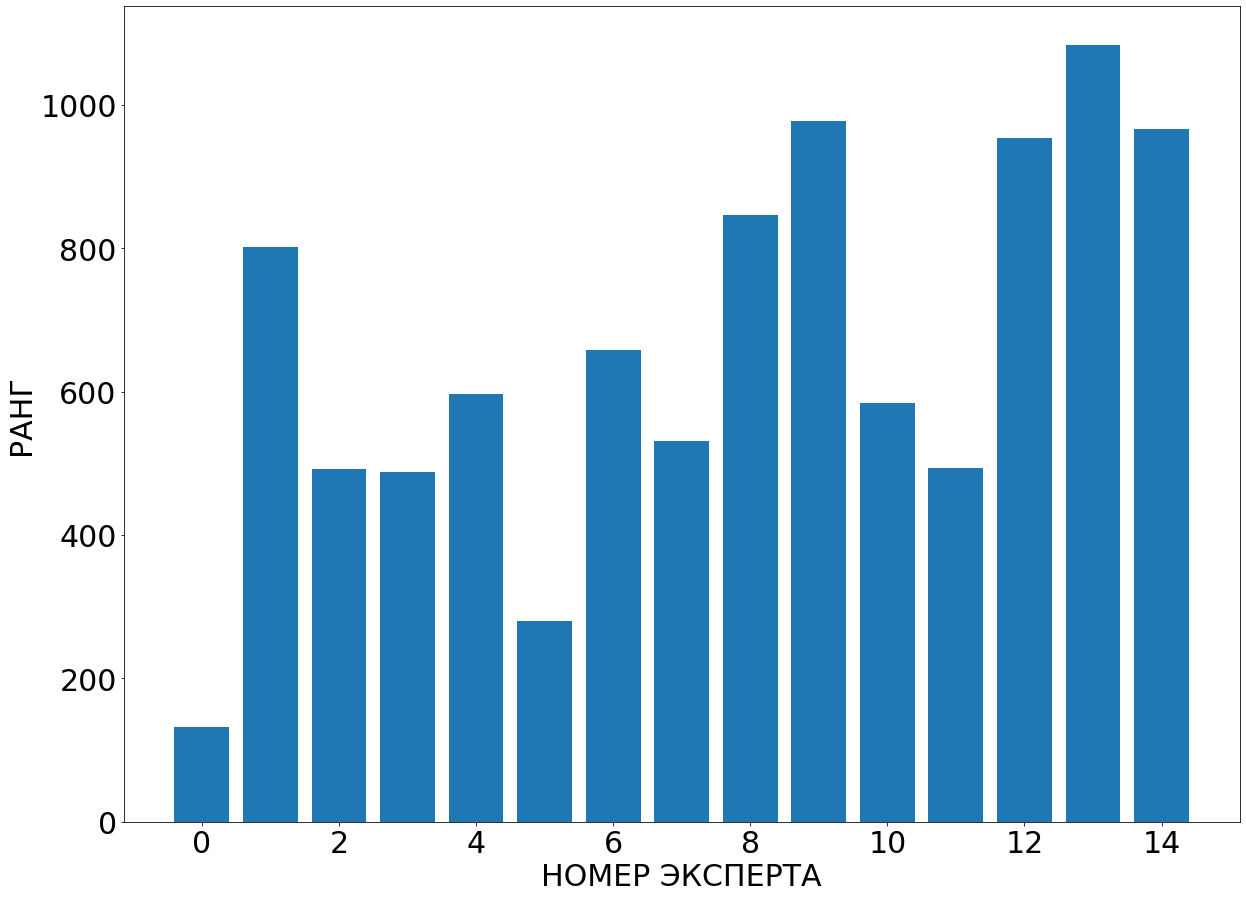

In [21]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.figure(figsize=[20,15])
plt.bar(list(range(len(rangs))), rangs)
plt.xlabel('НОМЕР ЭКСПЕРТА')
plt.ylabel('РАНГ')
plt.savefig('ratings.pdf')
plt.show()

In [24]:
weights = rangs/sum(rangs)
weights

array([0.0134367 , 0.08115364, 0.04982306, 0.04929258, 0.06030387,
       0.0282814 , 0.06651934, 0.05379721, 0.0855747 , 0.09891197,
       0.05916151, 0.04989375, 0.09647832, 0.10957628, 0.09779568])

In [26]:
prediction = np.zeros(8)

In [28]:
for i in range(q0.shape[0]):
    prediction += weights[i]*q0[i]

In [29]:
prediction

array([5.44802132, 5.81226427, 5.97924967, 4.07749839, 6.23704921,
       7.09649406, 4.58604792, 6.10161756])

In [30]:
for i, c in enumerate(prediction):
    print(i,c)

0 5.448021318851441
1 5.812264274576337
2 5.979249673037745
3 4.07749839052345
4 6.2370492124814385
5 7.096494059233755
6 4.586047919616528
7 6.101617561673757


In [31]:
rating = np.zeros(8)

In [32]:
rating[5] = 1
rating[4] = 2
rating[7] = 3
rating[2] = 4
rating[1] = 5
rating[0] = 6
rating[6] = 7
rating[3] = 8

In [33]:
my_rating=rating

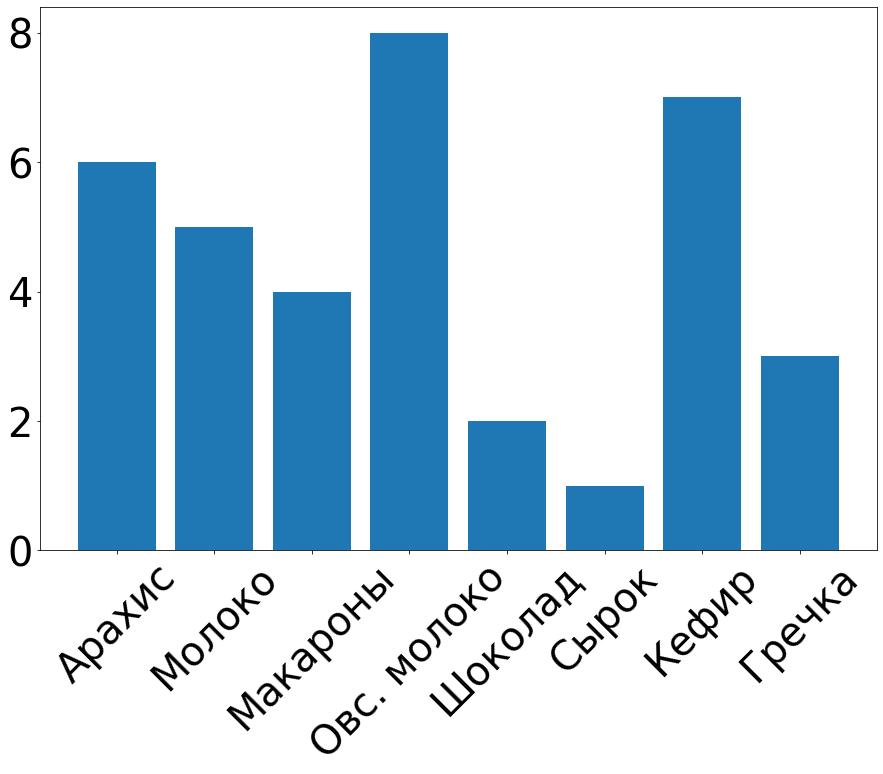

In [34]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 40

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

value = tuple(my_rating)
position = np.arange(8)

fig, ax = plt.subplots()
fig.figsize=[20,15]

ax.bar(position, value)

#  Устанавливаем позиции тиков:
ax.set_xticks(position)

#  Устанавливаем подписи тиков
ax.set_xticklabels([r'Арахиc', r'Молоко' , r'Макароны',\
         r'Овс. молоко', r'Шоколад', r'Сырок',\
        r'Кефир', r'Гречка'])
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelrotation = 45)    #  Поворот подписей
fig.set_figwidth(15)
fig.set_figheight(10)

plt.savefig('food_ratings.pdf')
plt.show()

In [35]:
my_rating = rating
svyato_rating = np.array([5,4,6,7,3,1,8,2])
anton_rating = np.array([6,7,4,8,1,2,3,5])
viktor_rating = np.array([8,5,6,7,1,2,4,3])
petr_rating = np.array([4,5,6,7,2,1,8,3])
pavel_rating = np.array([1,4,8,6,3,5,2,7])

In [36]:
import matplotlib.pyplot as plt

In [37]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

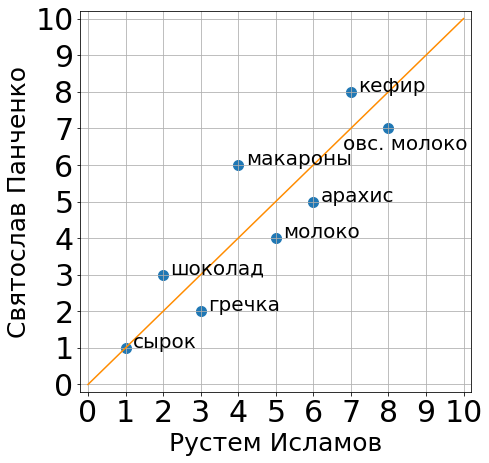

In [52]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(my_rating, svyato_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=25)
plt.ylabel(r'Святослав Панченко', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 1.0, 'сырок', fontsize=20)
plt.text(2.2, 3.0, 'шоколад', fontsize=20)
plt.text(3.2, 2.0, 'гречка', fontsize=20)
plt.text(4.2, 6.0, 'макароны', fontsize=20)
plt.text(5.2, 4.0, 'молоко', fontsize=20)
plt.text(6.2, 5.0, 'арахис', fontsize=20)
plt.text(7.2, 8.0, 'кефир', fontsize=20)
plt.text(6.8, 6.4, 'овс. молоко', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_svyato.pdf')

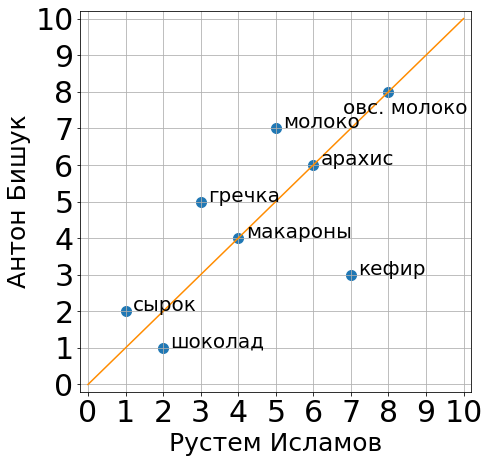

In [59]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(my_rating, anton_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=25)
plt.ylabel(r'Антон Бишук', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 2.0, 'сырок', fontsize=20)
plt.text(2.2, 1.0, 'шоколад', fontsize=20)
plt.text(3.2, 5.0, 'гречка', fontsize=20)
plt.text(4.2, 4.0, 'макароны', fontsize=20)
plt.text(5.2, 7.0, 'молоко', fontsize=20)
plt.text(6.2, 6.0, 'арахис', fontsize=20)
plt.text(7.2, 3.0, 'кефир', fontsize=20)
plt.text(6.8, 7.4, 'овс. молоко', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_anton.pdf')

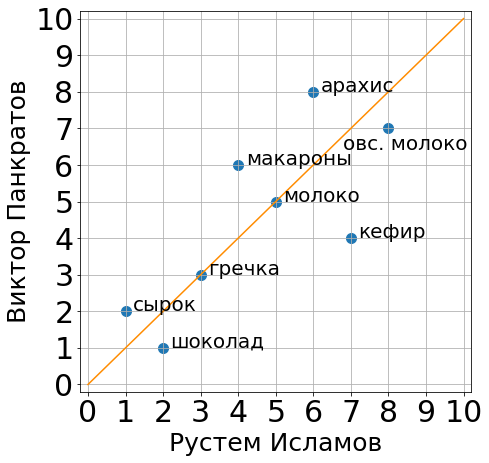

In [65]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(my_rating, viktor_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=25)
plt.ylabel(r'Виктор Панкратов', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 2.0, 'сырок', fontsize=20)
plt.text(2.2, 1.0, 'шоколад', fontsize=20)
plt.text(3.2, 3.0, 'гречка', fontsize=20)
plt.text(4.2, 6.0, 'макароны', fontsize=20)
plt.text(5.2, 5.0, 'молоко', fontsize=20)
plt.text(6.2, 8.0, 'арахис', fontsize=20)
plt.text(7.2, 4.0, 'кефир', fontsize=20)
plt.text(6.8, 6.4, 'овс. молоко', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_victor.pdf')

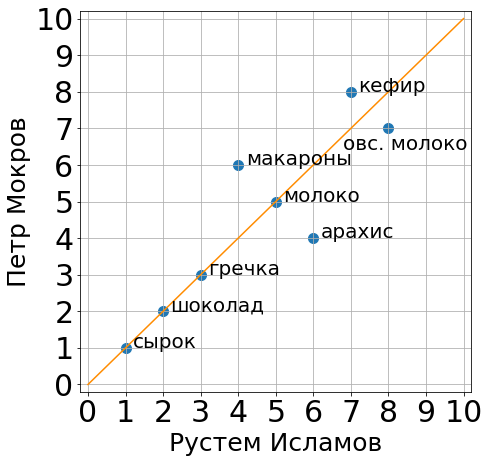

In [70]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(my_rating, petr_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=25)
plt.ylabel(r'Петр Мокров', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 1.0, 'сырок', fontsize=20)
plt.text(2.2, 2.0, 'шоколад', fontsize=20)
plt.text(3.2, 3.0, 'гречка', fontsize=20)
plt.text(4.2, 6.0, 'макароны', fontsize=20)
plt.text(5.2, 5.0, 'молоко', fontsize=20)
plt.text(6.2, 4.0, 'арахис', fontsize=20)
plt.text(7.2, 8.0, 'кефир', fontsize=20)
plt.text(6.8, 6.4, 'овс. молоко', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_petr.pdf')